In [1]:
import numpy as np
from scripts.mesh import *
from scripts.simulation import *

import matplotlib
import matplotlib.pyplot as plt

# Construct the mesh to work on (topology)

In [2]:
mesh_degree_settings = MESH_DEGREE_SETTINGS
mesh_settings = MESH_SETTINGS

mesh_degree_settings[4] = 0.75
mesh_degree_settings[3] = 0.85
# mesh_degree_settings[2] = 0.97

print (mesh_settings)

{'grid_size': 10, 'contraction_ratio': 0.0, 'degree_settings': {2: 1, 3: 0.85, 4: 0.75, 5: 1, 6: 1}}


In [3]:
# mesh = create_mesh(mesh_settings)
# sparseness = calculate_sparseness(mesh)
# print (f'sparseness of the created mesh (compare to the grid network) {sparseness}')

# Valve failure simulation

## Single repair scenario 

In [4]:
vfail_rate = 0.5
mc_num = 100
grid_size = mesh_settings['grid_size']
pids2sim = list(range((grid_size-1)*2*grid_size))

In [5]:
direct_sum, unintend_sum = np.zeros(len(pids2sim)), np.zeros(len(pids2sim))
num_sim = 0
sim_count = np.zeros(len(pids2sim))


while num_sim < mc_num:
    try:
        mesh = create_mesh(mesh_settings)
        sparseness = calculate_sparseness(mesh)
        print (f'sparseness of the created mesh (compare to the grid network) {sparseness}')
    except:
        continue
    # Single repair scenario
    direct,unintend = mc_single_iso_consequence(mesh,vfail_rate,pids2sim)
    direct_ratio = direct/len(mesh.valid_pids)
    unintend_ratio = unintend/len(mesh.valid_pids)
    
    valid_pid_mask = np.zeros(len(pids2sim))
    valid_pid_mask[list(mesh.valid_pids)] = 1
    sim_count += valid_pid_mask

    direct_sum += direct_ratio*valid_pid_mask
    unintend_sum += unintend_ratio*valid_pid_mask
    
    num_sim+=1
    
ave_direct = direct_sum/sim_count
ave_unintend = unintend_sum/sim_count

sparseness of the created mesh (compare to the grid network) 0.7160493827160493
sparseness of the created mesh (compare to the grid network) 0.7777777777777778
sparseness of the created mesh (compare to the grid network) 0.8395061728395061
sparseness of the created mesh (compare to the grid network) 0.654320987654321
sparseness of the created mesh (compare to the grid network) 0.7160493827160493
sparseness of the created mesh (compare to the grid network) 0.7654320987654321
sparseness of the created mesh (compare to the grid network) 0.8024691358024691
sparseness of the created mesh (compare to the grid network) 0.7407407407407407
sparseness of the created mesh (compare to the grid network) 0.7160493827160493
sparseness of the created mesh (compare to the grid network) 0.8148148148148148
sparseness of the created mesh (compare to the grid network) 0.7654320987654321
sparseness of the created mesh (compare to the grid network) 0.7037037037037037
sparseness of the created mesh (compare t

In [6]:
def plot_single_iso_consequence(pids2sim,direct_ratio,unintend_ratio):
    plt.bar(pids2sim, direct_ratio, label="direct")
    plt.bar(pids2sim, unintend_ratio, label="unintend")
#     plt.bar(pids2sim, direct_ratio+unintend_ratio, label="tot")
    
    plt.xlabel('pid')
    plt.ylabel('Avg impact ratio')
    plt.legend()
    plt.show()
    

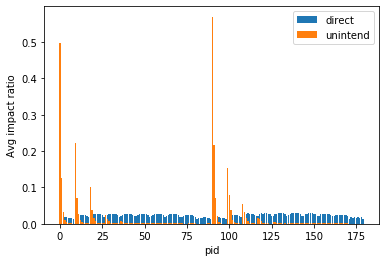

In [7]:
plot_single_iso_consequence(pids2sim,ave_direct,ave_unintend)

In [16]:
ave_unintend

array([2.42676381e-01, 1.39682312e-02, 7.84208358e-04, 1.00468510e-04,
       3.13395018e-06, 1.32053697e-05, 5.77434300e-05, 1.13772138e-04,
       5.56409423e-05, 4.31094231e-02, 2.13817609e-03, 1.01255953e-04,
       7.43204502e-06, 6.17128321e-06, 1.20905111e-05, 5.67923303e-05,
       1.25407741e-04, 7.22156331e-05, 3.01183397e-03, 6.79493626e-04,
       1.03862994e-04, 4.31720064e-06, 5.00249909e-06, 2.54100147e-06,
       1.27148147e-05, 6.95813228e-05, 5.60645646e-05, 4.06261595e-03,
       1.01056562e-05, 4.95394369e-06, 5.02513302e-06, 6.92963696e-06,
       6.39600326e-06, 1.31164124e-05, 7.33731107e-05, 5.09090293e-05,
       2.86425016e-04, 1.04890832e-04, 9.99970153e-06, 7.51416631e-06,
       8.14340871e-06, 9.50915353e-06, 1.06528785e-05, 7.58252292e-05,
       4.84979198e-05, 4.09987770e-06, 8.71035701e-06, 8.09228937e-06,
       6.86833773e-06, 6.18277790e-06, 5.59044916e-06, 1.94041365e-05,
       5.49929726e-05, 5.87794948e-05, 1.00594325e-05, 8.79343625e-06,
      

## Multiple isolation scenario 

In [ ]:
def multi_fail_simulation(mesh,fail_rates, degree_list):
    fail_results = []
    for fail_rate in fail_rates:
        print (f'Start simulating valve fail rate {fail_rate}')
        degree_result = []
        for degree in degree_list:
            results = mc_degree_impact(mesh,fail_rate,degree,mesh.valid_pids)
            degree_result.append(results)
        fail_results.append(degree_result)
    return fail_results

In [ ]:
fail_rates = np.linspace(0,0.8,4)
degree_list = list(range(1,15,2))
mc_num = 100

In [ ]:
mc_results = []
num_sim = 0
while num_sim < mc_num:
    try:
        mesh = create_mesh(mesh_settings)
        sparseness = calculate_sparseness(mesh)
        print (f'sparseness of the created mesh (compare to the grid network) {sparseness}')
    except:
        continue
    mc_results.append(multi_fail_simulation(mesh,fail_rates,degree_list)) 
    num_sim+=1

In [9]:
len(mc_results)

NameError: name 'mc_results' is not defined

In [ ]:
parsed_results = [parse_directs_unintends(result) for result in results]

In [ ]:
def plot_multi_iso_consequence(parsed_results,degree_list,fail_rates):
    for i, fail_rate in enumerate(fail_rates):
        fig = plt.figure()
        direct, unintend = np.array(parsed_results[i][0]),np.array(parsed_results[i][1])
        tot = (direct+unintend) /len(mesh.valid_pids)
        plt.plot(degree_list, direct/len(mesh.valid_pids), label="direct")
        plt.plot(degree_list, unintend/len(mesh.valid_pids), label="unintend")
        plt.plot(degree_list, tot, label="tot")

        plt.xlabel('num of pipes to fix')
        plt.ylabel('# of components')
        plt.title(f'valve fail rate: {fail_rate}')
        plt.legend()
    

In [ ]:
plot_multi_iso_consequence(parsed_results,degree_list,fail_rates)